In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#shape
data.shape

(303, 14)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#variable types
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

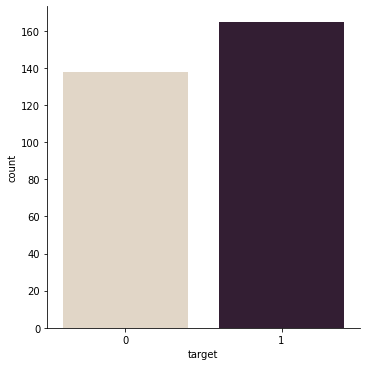

In [7]:
#outcome variable count

sns.catplot(x='target', kind = 'count', palette='ch: .25', data = data)

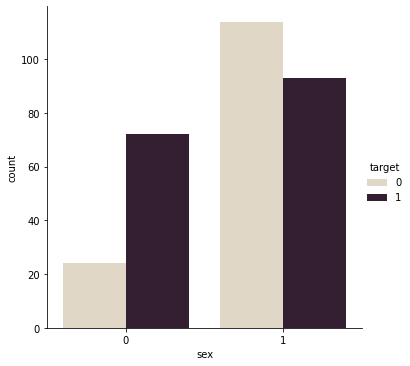

In [8]:
#categorical predictive values
#sex
sns.catplot(x='sex', kind='count',hue = 'target', data = data, palette = 'ch: .28')

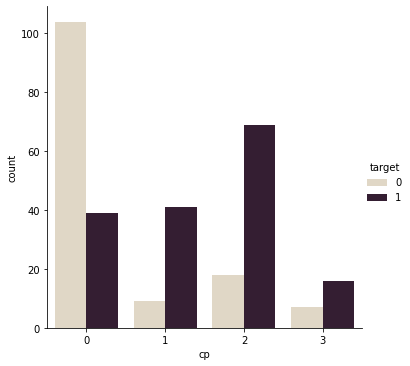

In [9]:
#cp
sns.catplot(x='cp', kind='count',hue = 'target', data = data, palette = 'ch: .28')

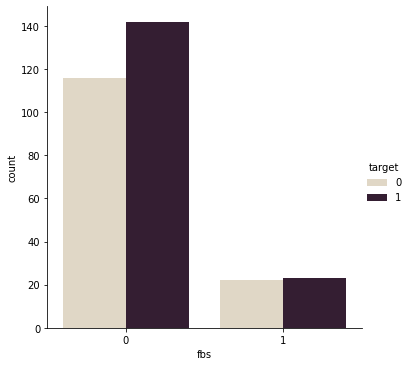

In [10]:
sns.catplot(x='fbs', kind='count',hue = 'target', data = data, palette = 'ch: .28')

In [11]:
#distributive variables
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


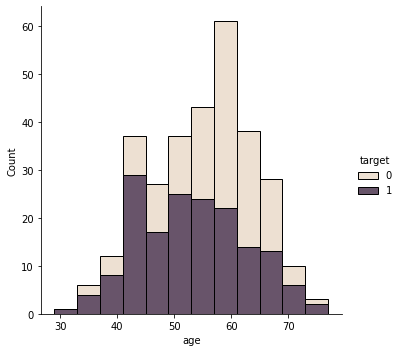

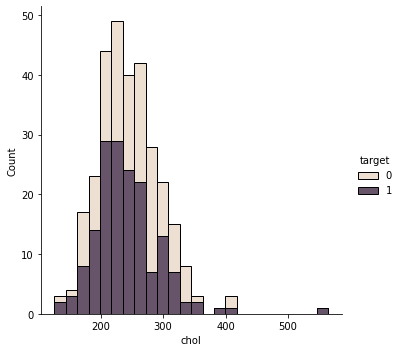

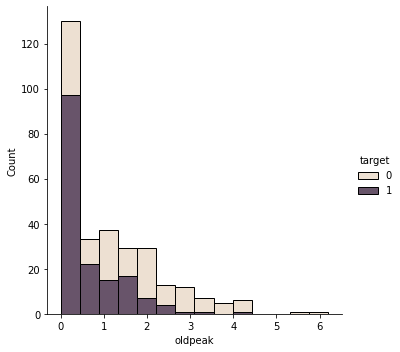

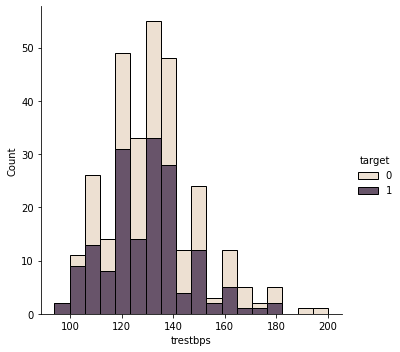

In [12]:
sns.displot(x='age',multiple='stack',hue='target',data=data,palette='ch: .2')
sns.displot(x='chol',multiple='stack',hue='target',data=data,palette='ch: .2')
sns.displot(x='oldpeak',multiple='stack',hue='target',data=data,palette='ch: .2')
sns.displot(x='trestbps',multiple='stack',hue='target',data=data,palette='ch: .2')

Accuacy Before Standardizing 

In [14]:
#define x train,test y train,test
x = data.drop('target',axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [15]:
knn = KNeighborsClassifier(n_neighbors=7)


knn.fit(x_train,y_train)


Y_pred_knn=knn.predict(x_test)

In [16]:
Y_pred_knn.shape

(61,)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 63.93 %


After Standardizing

In [20]:
#standardize data The idea is to rescalean orignal value to have equal impact
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [21]:
#parameters for grid search
knn = KNeighborsClassifier
parameters = {'n_neighbors': [3,4,7,9,11], 'weights': ['uniform','distance']}

In [22]:
grid_params = {
    'n_neighbors': [3,4,5,7,9,11],
    'weights': ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan']
    }



In [23]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 4,
    
    scoring='accuracy'
)

In [24]:
gs_results = gs.fit(x_train, y_train)

In [25]:
print(gs_results.best_params_)

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [26]:
model = gs_results.best_estimator_

In [27]:
model.score(x_test, y_test)

0.819672131147541

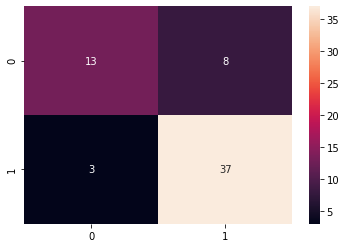

In [28]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [29]:
TP = 13
FP = 3
TN = 37
FN = 8
accu = (TP + TN) / (TP + TN + FP + FN)
miss = (FP + FN) / (TP + TN + FP + FN)
print(accu)
print(miss)
sensitivity = TP / (TP+FN )* 100
specificity = TN /(TN + FP)*100
ppv = TP / (TP+FP) *100
npv = TN / (TN*FN) *100

0.819672131147541
0.18032786885245902


In [30]:
print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' ) 

Sensitivity: 61.904761904761905 %  Specificity: 92.5 %  positive predictive value: 81.25 %  negative predictive value: 12.5 %


In [31]:
probs = model.predict_proba(x_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs)
print(auc)

0.8738095238095238


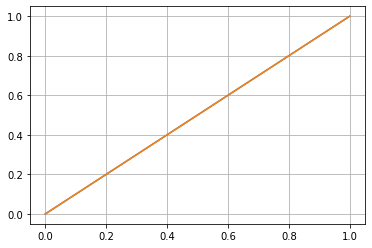

In [32]:
fpr, tpr, _ = metrics.roc_curve(y_test,probs)
plt.figure()
plt.grid()
plt.plot([0,1],[0,1])
plt.plot([0, 1], [0, 1])
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=7)


knn.fit(x_train,y_train)


Y_pred_knn=knn.predict(x_test)

In [34]:
Y_pred_knn.shape

(61,)

In [ ]:
from sklearn.metrics import accuracy_score

In [35]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 81.97 %
